In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Implementación del algoritmo genético

Función para generar una población inicial aleatoria: 

* "n" indica el tamaño de la población a generar o el números de individuos.


* Cada individuo es una lista de 10 números generados aleatoriamente entre el limite inferior y superior.



In [2]:
def generar_poblacion_inicial(n, limite_inferior, limite_superior):
    poblacion = []
    for _ in range(n):
        individuo = [random.uniform(limite_inferior, limite_superior) for _ in range(10)]
        poblacion.append(individuo)
    return poblacion

Función de selección de padres (torneo binario):

* "poblacion": es una lista de individuos.

* "tam_torneo": es el número de      participantes que participara en cada torneo binario.

* random.sample: selecciona "tam_torneo" elementos(individuos) de la lista "población", de manera aleatoria y sin reemplazo.

* Se encuentra al ganador del torneo binario utilizando "min()":

  * Está función encuentra el elemento mínimo de la lista "participantes" utilizando la función de evaluación "Fesfera(x)" como clave para la comparación. El elemento mínimo es el individuo con el valor de función de evaluación más bajo y,
     ganador del torneo binario (se selecciona como padre)

* La función "seleccion_padres()" devuelve la lista "padres" que contiene dos inviduos seleccionados como padres.

In [3]:
def seleccion_padres(poblacion, tam_torneo):
    padres = []
    for _ in range(2):
        participantes = random.sample(poblacion, tam_torneo)
        ganador = min(participantes, key = lambda x: Fesfera(x))
        padres.append(ganador)
    return padres

Función de cruce (cruce de un punto):

* Recibe como argumento "padres": Una lista de dos individuos.

* random.randint(1,9): Genera un número entero aletorio en el rango [1,9] ambos inclusivos.

  * El punto de cruce puede ser después del primer gen y, antes del último gen.

* El primer "hijo1" se forma tomando los primeros "punto_cruce" elementos del cromosoma del 
  padre 1 (padres[0]) y los elementos restantes del cromosoma del padre 2 (padres[1]).

* El segundo "hijo2" se forma tomando los primeros "punto_cruce" elementos del cromosoma del
  padre 2 (padres[1]) y los elementos restantes del cromosoma del padre 1 (padres[0]).

* La función devuelve una tupla con los dos hijos obtenidos.

In [4]:
def cruce(padres):
    punto_cruce = random.randint(1, 9)
    hijo1 = padres[0][:punto_cruce] + padres[1][punto_cruce:]
    hijo2 = padres[1][:punto_cruce] + padres[0][punto_cruce:]
    return hijo1, hijo2

Función de mutación (mutación gaussiana)

* "desviacion_estandar": Desviación estándar de la distribución normal para generar los valores de mutación.

* En cada iteración se utiliza la función "random.random()" y, si el valor que genera es menor que la probabilidad de mutación, el gen sera mutado. De lo contrario se omite la mutación y se pasa al siguiente gen.

  * "random.random": Genera un numero aleatorio en entre 0.0 y 1.0

  * Si un gen será mutado, se utiliza "random.gauss()" para generar un valor aleatorio utilizando una distribución normal(o gaussiana), con media "0" y desviación estándar "desviacion_estandar". Este valor se suma al gen.

* Para asegurar que el valor ya mutado del gen se encuentre en dentro del intervalo [-5.12,5.12], se utiliza:

  * max(min(individuo[i], 5.12), -5.12)



In [5]:
def mutacion(individuo, prob_mutacion, desviacion_estandar):
    for i in range(10):
        if random.random() < prob_mutacion:
            individuo[i] += random.gauss(0, desviacion_estandar)
            individuo[i] = max(min(individuo[i], 5.12), -5.12)

Función de reemplazo (reemplazo generacional):

* "poblacion": Lista de individuos que representa la población actual.

* "descendencia": Lista de ind. que representa la descendencia generada a partir de la población actual.

* La función comienza agregando la descendencia a la población actual (concatenación de dos listas): nueva_poblacion = poblacion_actual + descendencia, utilizando el método "extend()".

* Después, la función ordena la nueva población por su valor de aptitud utilizando ".sort()":

  * ".sort()": Ordena utilizando como criterio una clave que es igual a una lambda que utiliza la función "Fesfera" para calcular el valor de aptitud de cada individuo.

* Finalmente, la función devuelve la mitad de la nueva población ordenada, que representa la nueva población generacional para la siguiente generación:

  * Utiliza el operador de división entera "//" para obtener la mitad de la longitud de la nueva población, de está manera,
se asegura que la nueva población generacional tenga la misma cantidad de individuos que la población original que venía como parametro en la función:

    * nueva_poblacion_generacional = nueva_poblacion // 2 

In [6]:
# def reemplazo(poblacion, descendencia):
#    poblacion.extend(descendencia)
#    poblacion.sort(key=lambda x: Fesfera(x))
#    return poblacion[:len(poblacion)//2]

def reemplazo(poblacion, descendencia, func):
    poblacion.extend(descendencia)
    poblacion.sort(key=lambda x: func(x))
    return poblacion[:len(poblacion)//2]


--------------------------------------------------

Funciones de prueba

Esfera: 

*   Minimizar la suma de los cuadrados de las variables de decisión.
*   Minimizar la función objetivo "Fesfera": significa minimizar la distancia al cuadrado entre el punto dado y el origen.



Graficando esfera

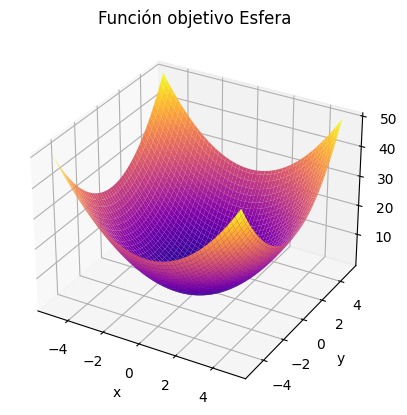

In [7]:
# Definir el rango de búsqueda
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Evaluar la función objetivo en cada punto de la malla
Z = X**2 + Y**2

# Crear la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie de la función objetivo
ax.plot_surface(X, Y, Z, cmap='plasma')

# Agregar etiquetas y título
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Función objetivo Esfera')

# Mostrar la figura
plt.show()

Función objetivo Fesfera: "x" es un objeto iterable.

In [8]:
def Fesfera(x):
    return sum(xi**2 for xi in x)

Implementación de algoritmo génetico para Fesfera

En este algoritmo se utilizan las siguientes técnicas:

- Selección de padres: torneo binario
- Cruce: cruce de un punto
- Mutación: mutación gaussiana
- Reemplazo: reemplazo generacional

Los parámetros del algoritmo se definen al inicio del código, y se utilizan valores típicos para ellos. En este caso, se establecen 100 individuos en la población inicial, se utiliza un torneo binario de tamaño 3 para la selección de padres, se fija una probabilidad de cruce de 0.8, una probabilidad de mutación de 0.1 y una desviación estándar de 0.1 para la mutación gaussiana. El algoritmo evoluciona durante 100 generaciones.

Cada vez que se imprime la mejor Fesfera encontrada en una generación, también se imprime el mejor individuo correspondiente a esa generación. Al final del algoritmo, se imprime el mejor individuo encontrado en todas las generaciones, junto con su valor de Fesfera correspondiente.

Puedes ajustar los valores de los parámetros del algoritmo según sea necesario para encontrar mejores soluciones.

In [9]:
# Creamos un dataframe vacío con las columnas correspondientes para almacenar los valores de cada generación
df_Fesfera = pd.DataFrame(columns=['Generación', 'Mejor Individuo', 'Fesfera'])

Generación 0: Mejor individuo = [-1.8726561669459478, -1.4103376634521023, -1.9333094263545072, -0.5049673003983717, 0.0011577417582415706, 1.3254099838470026, 1.930711635577885, 2.6043311290785187, -1.8883518566362363, 2.069004046063573], Fesfera = 29.602122249434508
Generación 1: Mejor individuo = [-1.8726561669459478, -1.4103376634521023, -1.9333094263545072, -0.5049673003983717, 0.0011577417582415706, 1.3254099838470026, 1.930711635577885, 2.6043311290785187, -1.8883518566362363, 2.069004046063573], Fesfera = 29.602122249434508
Generación 2: Mejor individuo = [-1.8726561669459478, -1.4103376634521023, -1.9333094263545072, -0.5049673003983717, 0.0011577417582415706, 1.3254099838470026, 1.930711635577885, 2.6043311290785187, -1.8883518566362363, 2.069004046063573], Fesfera = 29.602122249434508
Generación 3: Mejor individuo = [-1.8726561669459478, -1.4103376634521023, -1.9333094263545072, -0.5049673003983717, 0.0011577417582415706, 1.3254099838470026, 1.930711635577885, 0.652407613526

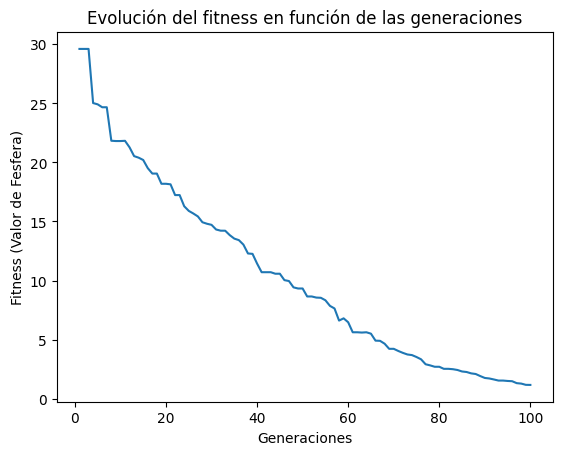

In [10]:
# parámetros del algoritmo genético
tam_poblacion = 100
tam_torneo = 3
prob_cruce = 0.8
prob_mutacion = 0.1
desviacion_estandar = 0.1
num_generaciones = 100

# generación de la población inicial
poblacion = generar_poblacion_inicial(tam_poblacion, -5.12, 5.12)

# listas para almacenar los valores de fitness y las generaciones
fitness_generacion = []
generaciones = []

# evolución de la población a lo largo de las generaciones
for gen in range(num_generaciones):
    # selección de padres
    padres = seleccion_padres(poblacion, tam_torneo)

    # cruce de los padres para generar descendencia:
    # • Se generan "tam_poblacion/2" descendientes
    descendencia = []
    for i in range(0, tam_poblacion, 2):
        if random.random() < prob_cruce:
            hijo1, hijo2 = cruce(padres)
            descendencia.append(hijo1)
            descendencia.append(hijo2)
        else:
            descendencia.append(poblacion[i])
            descendencia.append(poblacion[i+1])

    # mutación de la descendencia generada
    for individuo in descendencia:
        mutacion(individuo, prob_mutacion, desviacion_estandar)

    # reemplazo de la población anterior por la nueva población generada
    poblacion = reemplazo(poblacion, descendencia, Fesfera)

    # impresión del mejor individuo de la generación actual
    mejor_individuo = poblacion[0]
    print(f"Generación {gen}: Mejor individuo = {mejor_individuo}, Fesfera = {Fesfera(mejor_individuo)}")

    # Crear un dataframe con los valores de esta generación
    data = pd.DataFrame({'Generación': [gen],
                         'Mejor Individuo': [mejor_individuo],
                         'Fesfera': [Fesfera(mejor_individuo)]})

    # Concatenar el dataframe con los valores de la generación actual al dataframe completo
    df_Fesfera = pd.concat([df_Fesfera, data], ignore_index=True)

    # almacenamiento de los valores de fitness y las generaciones
    fitness_generacion.append(Fesfera(mejor_individuo))
    generaciones.append(gen+1)

# impresión del mejor individuo de la última generación
mejor_individuo = poblacion[0]
print(f"Mejor Fesfera encontrada = {Fesfera(mejor_individuo)}")
print(f"Mejor solución encontrada = {mejor_individuo}")

# gráfico del fitness versus las generaciones
plt.plot(generaciones, fitness_generacion)
plt.xlabel("Generaciones")
plt.ylabel("Fitness (Valor de Fesfera)")
plt.title("Evolución del fitness en función de las generaciones")
plt.show()

In [11]:
df_Fesfera

,Generación,Mejor Individuo,Fesfera
0,0,"[-1.798100532941052, -1.4103376634521023, -1.9...",29.602122
1,1,"[-1.798100532941052, -1.4103376634521023, -1.9...",29.602122
2,2,"[-1.798100532941052, -1.4103376634521023, -1.9...",29.602122
3,3,"[-1.8726561669459478, -1.4103376634521023, -1....",25.020652
4,4,"[-1.8726561669459478, -1.4103376634521023, -1....",24.912398
...,...,...,...
95,95,"[-0.35407255087937867, 0.10121124242290769, -0...",1.481173
96,96,"[-0.35407255087937867, -0.002529464031943974, ...",1.316718
97,97,"[-0.35407255087937867, -0.002529464031943974, ...",1.279068
98,98,"[-0.35407255087937867, -0.002529464031943974, ...",1.174131


In [12]:
# Exportar el DataFrame a un archivo xlsx
df_Fesfera.to_excel('Fesfera.xlsx', index=False)

Rosenbrock:

* Elemento de la lista
* Elemento de la lista

Graficando Rosenbrock

In [13]:
def rosenbrockGrap(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

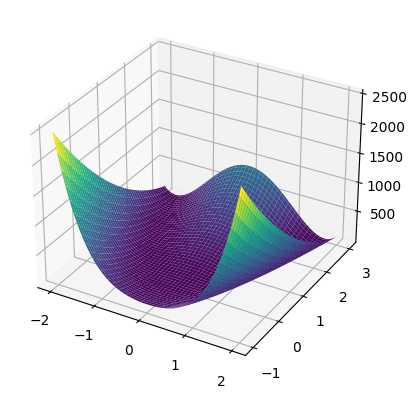

In [ ]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrockGrap(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

Función objetivo Rosenbrock: 
* "x" es un objeto iterable
* n >= 2

In [ ]:
# def Frosenbrock(n):
#     x = [random.uniform(-2.048, 2.048) for i in range(n)]
#     suma = 0
#     for i in range(0, n-1):
#         suma += 100 * ((x[i]**2 - x[i+1])**2) + (1 - x[i])**2
#     return suma
def Frosenbrock(x):
    return sum((100 * ((xi**2 - (xi+1))**2) + (1 - xi)**2) for xi in x)

Implementación de algoritmo genético para Rosenbrock

En este algoritmo se utilizan las siguientes técnicas:

- Selección de padres: torneo binario
- Cruce: cruce de un punto
- Mutación: mutación gaussiana
- Reemplazo: reemplazo generacional

Los parámetros del algoritmo se definen al inicio del código, y se utilizan valores típicos para ellos. En este caso, se establecen 100 individuos en la población inicial, se utiliza un torneo binario de tamaño 3 para la selección de padres, se fija una probabilidad de cruce de 0.8, una probabilidad de mutación de 0.1 y una desviación estándar de 0.1 para la mutación gaussiana. El algoritmo evoluciona durante 100 generaciones.

Cada vez que se imprime la mejor Frosenbrock encontrada en una generación, también se imprime el mejor individuo correspondiente a esa generación. Al final del algoritmo, se imprime el mejor individuo encontrado en todas las generaciones, junto con su valor de Frosenbrock correspondiente.

Puedes ajustar los valores de los parámetros del algoritmo según sea necesario para encontrar mejores soluciones.

In [ ]:
df_Frosenbrock = pd.DataFrame(columns=['Generación', 'Mejor Individuo', 'Frosenbrock'])

Generación 0: Mejor individuo = [0.8546507616696548, 2.8098111400226653, -1.463454606140841, 0.47222177375594043, -0.6465817203525726, 3.5299525418854865, 0.1470815753953847, 1.617408394046274, 3.721291935779891, -0.5317241520377092], Frosenbrock = 17409.34240832231
Generación 1: Mejor individuo = [0.8546507616696548, 2.8098111400226653, -1.463454606140841, 0.47222177375594043, -0.6465817203525726, 3.5299525418854865, 0.1470815753953847, 1.617408394046274, 3.721291935779891, -0.5317241520377092], Frosenbrock = 17409.34240832231
Generación 2: Mejor individuo = [0.8546507616696548, 2.8098111400226653, -1.463454606140841, 0.47222177375594043, -0.6465817203525726, 3.37401095310213, 0.1470815753953847, 1.617408394046274, 3.721291935779891, 2.2255306063856715], Frosenbrock = 16327.164204209876
Generación 3: Mejor individuo = [0.8546507616696548, 2.8098111400226653, -1.463454606140841, 0.47222177375594043, -0.6465817203525726, 3.37401095310213, 0.1470815753953847, 1.617408394046274, 3.7212919

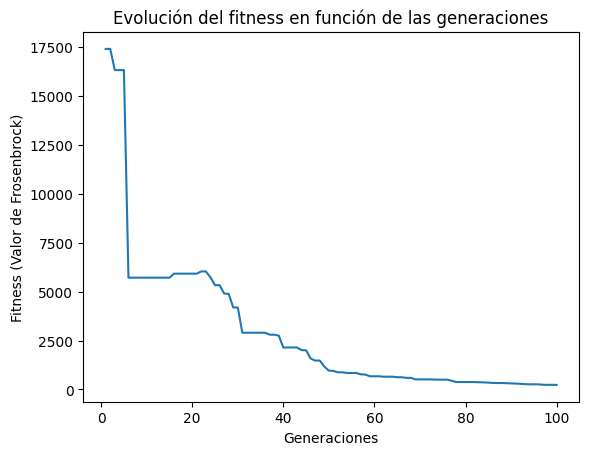

In [ ]:
tam_poblacion = 100
tam_torneo = 3
prob_cruce = 0.8
prob_mutacion = 0.1
desviacion_estandar = 0.1
num_generaciones = 100

poblacion = generar_poblacion_inicial(tam_poblacion, -5.12, 5.12)

fitness_generacion = []
generaciones = []

for gen in range(num_generaciones):
    
    padres = seleccion_padres(poblacion, tam_torneo)

    descendencia = []
    for i in range(0, tam_poblacion, 2):
        if random.random() < prob_cruce:
            hijo1, hijo2 = cruce(padres)
            descendencia.append(hijo1)
            descendencia.append(hijo2)
        else:
            descendencia.append(poblacion[i])
            descendencia.append(poblacion[i+1])

    for individuo in descendencia:
        mutacion(individuo, prob_mutacion, desviacion_estandar)

    poblacion = reemplazo(poblacion, descendencia, Frosenbrock)

    mejor_individuo = poblacion[0]
    print(f"Generación {gen}: Mejor individuo = {mejor_individuo}, Frosenbrock = {Frosenbrock(mejor_individuo)}")

    data = pd.DataFrame({'Generación': [gen],
                         'Mejor Individuo': [mejor_individuo],
                         'Frosenbrock': [Frosenbrock(mejor_individuo)]})

    df_Frosenbrock = pd.concat([df_Frosenbrock, data], ignore_index=True)

    fitness_generacion.append(Frosenbrock(mejor_individuo))
    generaciones.append(gen+1)

mejor_individuo = poblacion[0]
print(f"Mejor Frosenbrock encontrada = {Frosenbrock(mejor_individuo)}")
print(f"Mejor solución encontrada = {mejor_individuo}")

plt.plot(generaciones, fitness_generacion)
plt.xlabel("Generaciones")
plt.ylabel("Fitness (Valor de Frosenbrock)")
plt.title("Evolución del fitness en función de las generaciones")
plt.show()

In [ ]:
df_Frosenbrock

,Generación,Mejor Individuo,Frosenbrock
0,0,"[0.8774426830802499, 2.865943896172505, -1.651...",17409.342408
1,1,"[0.8774426830802499, 2.865943896172505, -1.651...",17409.342408
2,2,"[0.9168692231251101, 2.8098111400226653, -1.46...",16327.164204
3,3,"[0.9168692231251101, 2.8098111400226653, -1.46...",16327.164204
4,4,"[0.9168692231251101, 2.8098111400226653, -1.46...",16327.164204
...,...,...,...
95,95,"[1.405045475690507, -0.2361731272121354, -0.42...",263.712283
96,96,"[1.3142358967490986, -0.167870305300579, -0.43...",242.509785
97,97,"[1.492341282305826, -0.28159569828105435, -0.4...",238.322451
98,98,"[1.492341282305826, -0.28159569828105435, -0.4...",238.322451


In [ ]:
df_Frosenbrock.to_excel('Frosenbrock.xlsx', index=False)

Ackley:

*   Elemento de la lista
*   Elemento de la lista

Graficando Ackley

In [ ]:
def ackleyGrap(x, y):
    a = 20
    b = 0.2
    c = 2 * np.pi
    term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    term2 = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
    return term1 + term2 + a + np.exp(1)

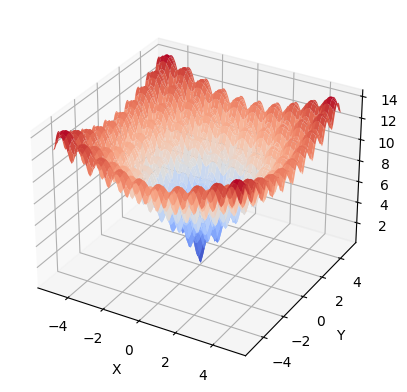

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = ackleyGrap(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Función objetivo Ackley: "x" es un objeto iterable

In [ ]:
# def Fesfera(x):
#     return sum(xi**2 for xi in x)
def Fackley(x):
    first_result = math.exp( (-0.2) * math.sqrt( (1/len(x)) * sum(xi**2 for xi in x) ) )
    second_result = math.exp( (1/len(x)) * sum( ( math.cos(2*math.pi*xi) ) for xi in x) )
    totalResult = -20 * first_result - second_result + 20 + math.e
    return totalResult

Implementación de algoritmo genético para Ackley

En este algoritmo se utilizan las siguientes técnicas:

- Selección de padres: torneo binario
- Cruce: cruce de un punto
- Mutación: mutación gaussiana
- Reemplazo: reemplazo generacional

Los parámetros del algoritmo se definen al inicio del código, y se utilizan valores típicos para ellos. En este caso, se establecen 100 individuos en la población inicial, se utiliza un torneo binario de tamaño 3 para la selección de padres, se fija una probabilidad de cruce de 0.8, una probabilidad de mutación de 0.1 y una desviación estándar de 0.1 para la mutación gaussiana. El algoritmo evoluciona durante 100 generaciones.

Cada vez que se imprime la mejor Fackley encontrada en una generación, también se imprime el mejor individuo correspondiente a esa generación. Al final del algoritmo, se imprime el mejor individuo encontrado en todas las generaciones, junto con su valor de Fackley correspondiente.

Puedes ajustar los valores de los parámetros del algoritmo según sea necesario para encontrar mejores soluciones.

In [ ]:
df_Fackley = pd.DataFrame(columns=['Generación', 'Mejor Individuo', 'Fackley'])

Generación 0: Mejor individuo = [-2.224251068741846, -1.2144137122212952, -0.043354709016727, 3.519854186850453, 1.4926728659048187, 0.5194740720686335, -0.02966287607633067, -0.567497042950623, -2.3100339061548074, 1.4149995201204772], Fackley = 7.732835957978699
Generación 1: Mejor individuo = [1.4414521659708317, -1.2144137122212952, -0.043354709016727, 3.519854186850453, 1.3894499476382562, 0.5194740720686335, -0.02966287607633067, -0.567497042950623, -2.3100339061548074, 1.4149995201204772], Fackley = 7.520354339433393
Generación 2: Mejor individuo = [1.4414521659708317, -1.1331278581576143, -0.06649704214357276, 3.519854186850453, 1.4926728659048187, 0.5194740720686335, 0.08679618824149077, -0.6288995500824959, 0.6934213407560801, 2.6964114295646233], Fackley = 7.515559060863934
Generación 3: Mejor individuo = [1.4414521659708317, -1.1331278581576143, -0.06649704214357276, 3.519854186850453, 1.4926728659048187, 0.5194740720686335, 0.08679618824149077, -0.6624599847205568, 0.69342

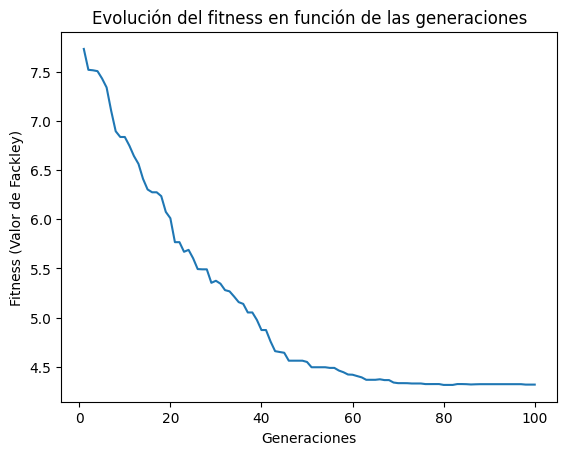

In [ ]:
tam_poblacion = 100
tam_torneo = 3
prob_cruce = 0.8
prob_mutacion = 0.1
desviacion_estandar = 0.1
num_generaciones = 100

poblacion = generar_poblacion_inicial(tam_poblacion, -5.12, 5.12)

fitness_generacion = []
generaciones = []

for gen in range(num_generaciones):
    
    padres = seleccion_padres(poblacion, tam_torneo)

    descendencia = []
    for i in range(0, tam_poblacion, 2):
        if random.random() < prob_cruce:
            hijo1, hijo2 = cruce(padres)
            descendencia.append(hijo1)
            descendencia.append(hijo2)
        else:
            descendencia.append(poblacion[i])
            descendencia.append(poblacion[i+1])

    for individuo in descendencia:
        mutacion(individuo, prob_mutacion, desviacion_estandar)

    poblacion = reemplazo(poblacion, descendencia, Fackley)

    mejor_individuo = poblacion[0]
    print(f"Generación {gen}: Mejor individuo = {mejor_individuo}, Fackley = {Fackley(mejor_individuo)}")

    # Crear un dataframe con los valores de esta generación
    data = pd.DataFrame({'Generación': [gen],
                         'Mejor Individuo': [mejor_individuo],
                         'Fackley': [Fackley(mejor_individuo)]})

    # Concatenar el dataframe con los valores de la generación actual al dataframe completo
    df_Fackley = pd.concat([df_Fackley, data], ignore_index=True)

    fitness_generacion.append(Fackley(mejor_individuo))
    generaciones.append(gen+1)

mejor_individuo = poblacion[0]
print(f"Mejor Fackley encontrada = {Fackley(mejor_individuo)}")
print(f"Mejor solución encontrada = {mejor_individuo}")

plt.plot(generaciones, fitness_generacion)
plt.xlabel("Generaciones")
plt.ylabel("Fitness (Valor de Fackley)")
plt.title("Evolución del fitness en función de las generaciones")
plt.show()

In [ ]:
df_Fackley

,Generación,Mejor Individuo,Fackley
0,0,"[-2.224251068741846, -1.2144137122212952, -0.0...",7.732836
1,1,"[1.4414521659708317, -1.3130773014353296, -0.0...",7.520354
2,2,"[1.5147223698112926, -1.1331278581576143, -0.0...",7.515559
3,3,"[1.5147223698112926, -1.1331278581576143, -0.0...",7.506752
4,4,"[-2.120993756678759, -1.2144137122212952, 0.07...",7.432244
...,...,...,...
95,95,"[0.9772559709128835, -0.9349452077336161, -0.0...",4.322543
96,96,"[0.9772559709128835, -0.9349452077336161, -0.0...",4.322543
97,97,"[0.9551831337547677, -0.9394868955455394, -0.0...",4.318222
98,98,"[0.9551831337547677, -0.9394868955455394, -0.0...",4.318222


In [ ]:
df_Fackley.to_excel('Fackley.xlsx', index=False)